In [1]:
import pandas as pd
churn_data = pd.read_csv('data/churn.csv')
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
churn_data = churn_data.drop('RowNumber', axis=1)

# Задание 1
Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

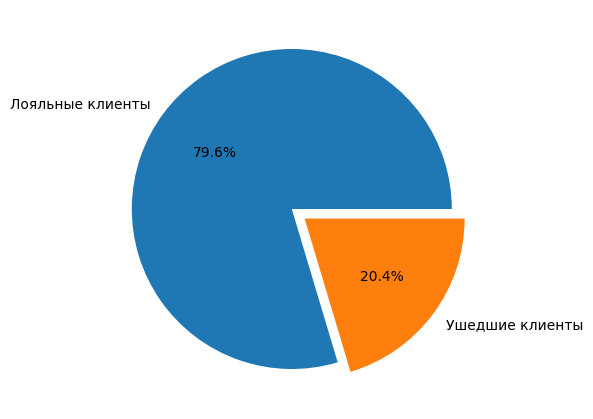

In [4]:
loyalty_status = churn_data.groupby('Exited')['CustomerId'].count()
#Заменяем 0 и 1 на строковые метки
loyalty_status['Лояльные клиенты']=loyalty_status.pop(0)
loyalty_status['Ушедшие клиенты']=loyalty_status.pop(1)
fig = plt.figure(figsize=(4, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    loyalty_status,
    labels=loyalty_status.index,
    autopct='%.1f%%',
    explode = [0, 0.1]
);

### Выводы по заданию 1:
Исходя их диаграммы, банк покинула примерно 1/5 часть от общего числа клиентов. Лояльных клиентов остается 4/5 от общего числа.

----------------------------------------------------------------------------------
# Задание2
Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

In [5]:
#Фильтруем пользователей, которые имеют больше 2500 долларов на балансе
df=churn_data[churn_data['Balance']>2500]

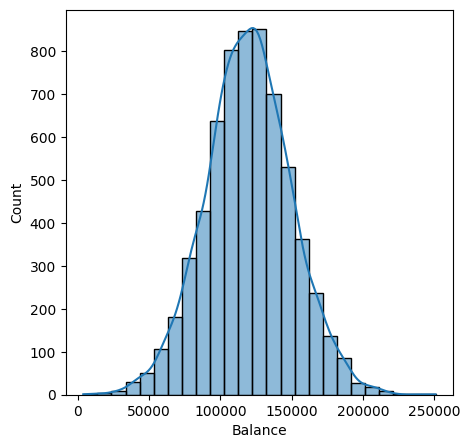

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
sns.histplot(
    data=df,
    x='Balance',
    bins=25,
    kde=True,
    
);

### Выводы по заданию 2
У большинства пользователей на балансе между 100 000 и 150 000 долларов. Очень небольшое количество людей имеет менее 50 000 на балансе. Также есть немного очень богатых людей, которые имеют более 200 000.  Распределение близко к нормальному распределению Гаусса.

-----------------------------------------------------
# Задание 3
 Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке

In [7]:
churn_data['Exited']=churn_data['Exited'].apply(lambda x: 'Лояльные клиенты' if x==0 else 'Ушедшие клиенты')



<Axes: xlabel='Balance', ylabel='Count'>

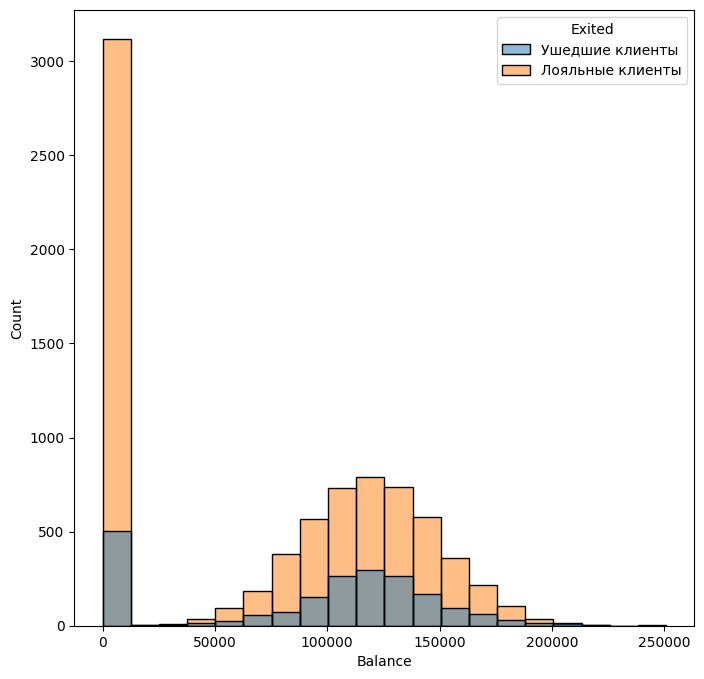

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

sns.histplot(
    data=churn_data,
    x='Balance',
    bins=20,
    hue='Exited'   

)



### Ответ на задание 3
Распределение баланса на счете у лояльных и ушедших клиентов одинаковое. То есть во всех диапазонах баланса есть как лояльные клиенты, так и ушедшие. Пики обеих гистограмм тоже совпадают. Наибольше число лояльных среди тех, у кого на счетах между 100 000 и 150 000. Наибольшее число ушедших в том же диапазоне. Это означает, что недовольство банком связано с каким-то другим признаком или признаками, а не с размером баланса.
Также имеется большое смещение лояльных клиентов к нулю, это вызвано большим количеством клиентов с нулевым баоансом

---------------------------------------------------------------
# Задание 4
Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

In [10]:
df3=churn_data[['Age','Exited']]

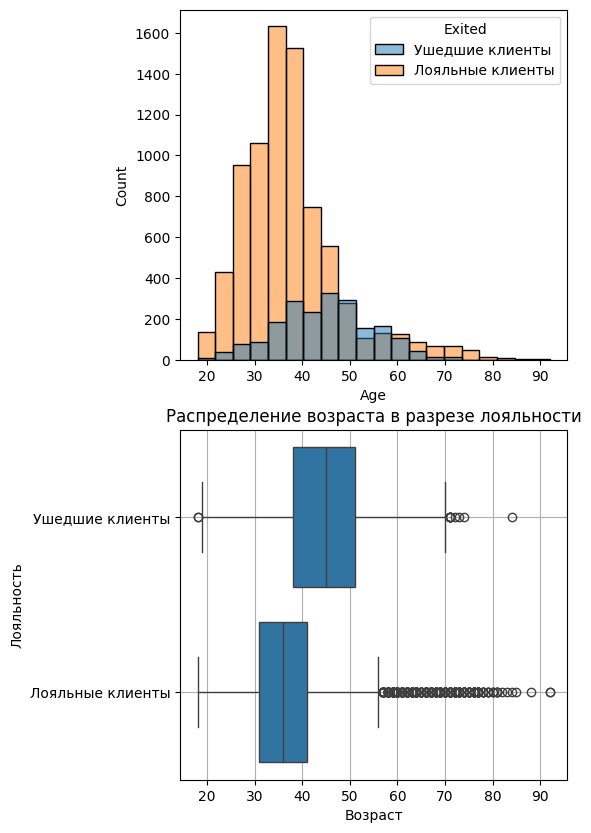

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5,10))

sns.histplot(
    data=df3,
    x='Age',
    bins=20,
    hue='Exited',
    ax=axes[0]   

)
boxplot = sns.boxplot(
    data=df3,
    y='Exited',
    x='Age',
    orient='h',
    ax=axes[1]
   
)
boxplot.set_title('Распределение возраста в разрезе лояльности');
boxplot.set_xlabel('Возраст');
boxplot.set_ylabel('Лояльность');
boxplot.grid()

### Ответ на задание 4
Выбросов больше в группе лояльных клиентов. Это означает, что в эту группу попадают люди с очень высоким значением возраста. 
Обратить внимание нужно на группу клиентов примерно от 38 до 52. Среди них самые высокие значения ушедших. Медианный возраст ушедшего примерно 45 лет. На клиентов от 50 до 65 тоже стоит обратить внимание. Их
 не очень много в банке, но среди них число ушедших превышает число лояльных.

______________________________________
# Задание 5
Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

In [12]:
df4=churn_data[['CreditScore', 'EstimatedSalary', 'Exited']]


<Axes: xlabel='CreditScore', ylabel='EstimatedSalary'>

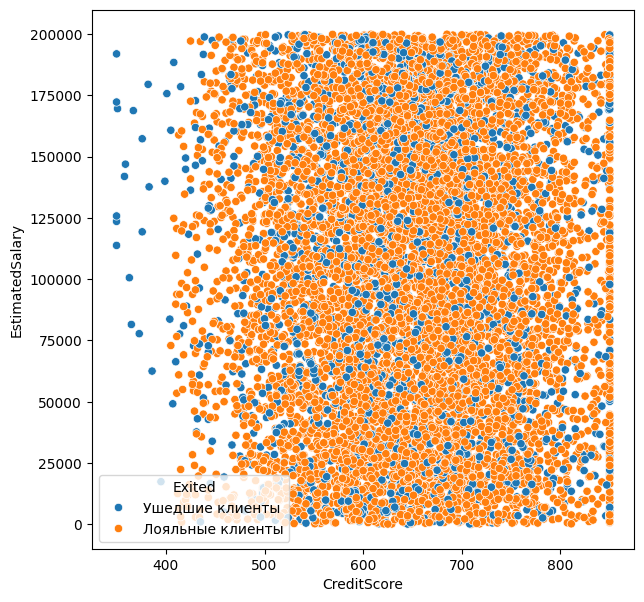

In [150]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7,7))
sns.scatterplot(
    data=df4, 
    x='CreditScore', 
    y='EstimatedSalary',
    hue='Exited')
   

### Ответ на задание 5
Здесь нет взаимосвязи. При любом значении заработной платы может быть любое значение рейтинга. От лояльности это тоже никак не зависит. Только у ушедших клиентов есть рейтинг ниже 400 (синие точечки слева)

________________
# Задание 6
Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [192]:
# Строим датафрейм, где будет пол, лояльность и процент ушедших и лояльных в разрезе пола
df5=churn_data[['Exited', 'Gender']]
# Процент ушедши мужчин от всех мужчие и процент лояльных мужчин отв сех мужчин
df5_Male=df5[df5['Gender']=='Male'].value_counts()/df5[df5['Gender']=='Male']['Gender'].count()*100
# Процент ушедших женщин от всех женщин и процент лояльных женщин от всех женщин
df5_Female=df5[df5['Gender']=='Female'].value_counts()/df5[df5['Gender']=='Female']['Gender'].count()*100

df5_Male=df5_Male.to_frame(name="percent")
df5_Female=df5_Female.to_frame(name="percent")
# объединяем все в один датафрейм
df6=pd.concat([df5_Male, df5_Female])


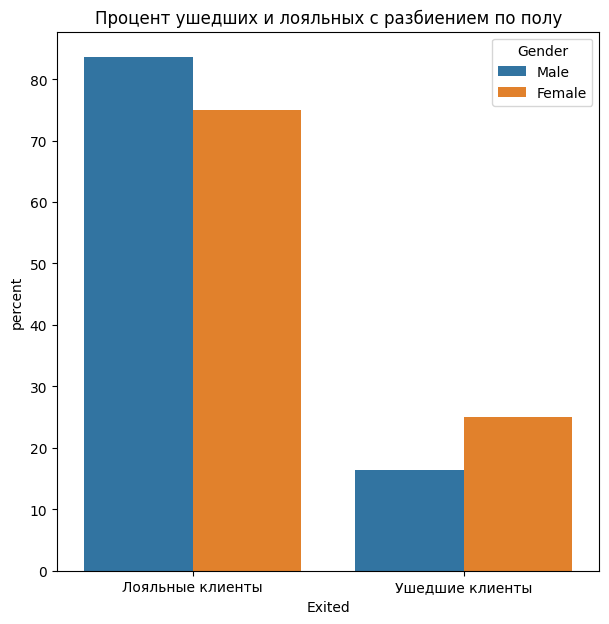

In [253]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7,7))
bar1=sns.barplot(
    data=df6, 
    x='Exited', 
    y='percent',
    hue='Gender'
  
   )
bar1.set_title('Процент ушедших и лояльных с разбиением по полу');   


### Ответ на задание 6
Получается, что женщины склонны уходить чаще мужчин. Процент ушедших женщин от всех женщин выше, чни процент ушедших мужчин от всех мужчин.

---------------------------
# Задание 7
Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [20]:
df7=churn_data[['Exited', 'NumOfProducts', 'CustomerId']]
df8=df7.groupby(by=['Exited','NumOfProducts'])['CustomerId'].count()
df8=df8.to_frame(name='numberOfCustomers')

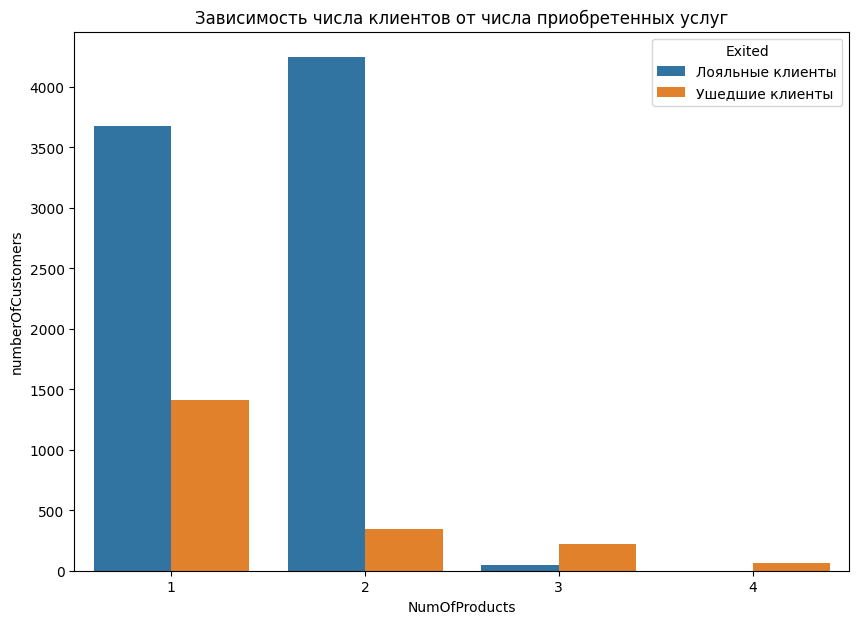

In [22]:
fig = plt.figure(figsize=(10, 7))

barplot = sns.barplot(
    data=df8,
    x='NumOfProducts',
    y='numberOfCustomers',
    hue='Exited'
  
)
barplot.set_title('Зависимость числа клиентов от числа приобретенных услуг');

# Ответ на задание 7
Больше всего ушедших клиенов среди тех, кто приобрел одну услугу.

__________________________
# Задание 8 
Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [247]:
# строим датафрейм, где будет число клиентов в разрезе активности и лояльности
df9=churn_data[['Exited', 'IsActiveMember']]
df9['IsActiveMember']=df9['IsActiveMember'].apply(lambda x: 'Активный' if x==1 else 'Не активный')
df10=df9[['Exited', 'IsActiveMember']].value_counts()
df10=df10.to_frame(name='numberOfClients')


C:\Users\USER\AppData\Local\Temp\ipykernel_19128\1821584214.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df9['IsActiveMember']=df9['IsActiveMember'].apply(lambda x: 'Активный' if x==1 else 'Не активный')


C:\Users\USER\AppData\Local\Temp\ipykernel_19128\3288225181.py:12: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:yellow'` for the same effect.

  bar2=sns.barplot(


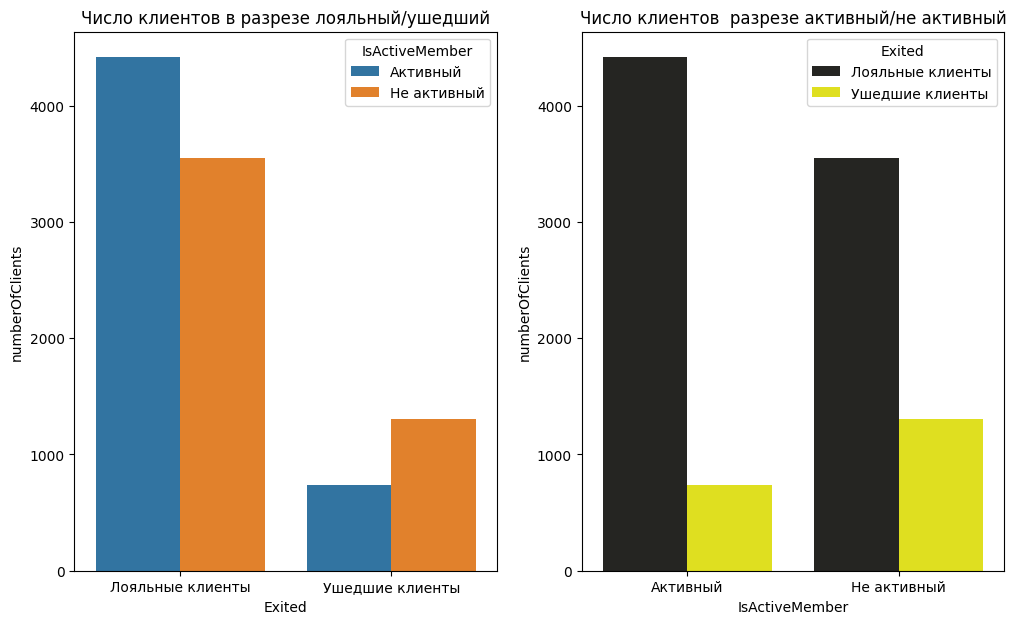

In [254]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,7))
bar1=sns.barplot(
    data=df10, 
    x='Exited', 
    y='numberOfClients',
    hue='IsActiveMember',
    ax=axes[0],
    
  
   )
bar1.set_title('Число клиентов в разрезе лояльный/ушедший');
bar2=sns.barplot(
    data=df10, 
    x='IsActiveMember', 
    y='numberOfClients',
    hue='Exited',
    ax=axes[1],
    color='yellow'
  
   )
bar2.set_title('Число клиентов  разрезе активный/не активный');

# Ответ на задание 8
Среди ушедших клиентов активных почти в два раза меньше (первый график), чем неактивных. Доля ушедших среди активнх невелика (это видно на втором графике). Поэтому есть риск, что все неактивные лояльные клиенты со временем могут уйти. Следует подтолкнуть их к переходу в активный статус.

_________________
# Задание 9
В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [24]:
import plotly
import plotly.express as px
# Строим фрейм: число ушедших клиентов по странам
df11=churn_data[churn_data['Exited']=='Ушедшие клиенты'].groupby(by='Geography')['CustomerId'].count()
df11=df11.to_frame(name='numberOfExited')


In [25]:
# Считаем общее число клиентов по странам
df12=churn_data.groupby(by='Geography')['CustomerId'].count()
df12=df12.to_frame(name='numberOfCustomers')

#Соединяем фреймы и считаем процент ушедших по каждой стране от общего числа клиентов
df11=df11.merge(df12,on='Geography')
df11['percentOfExited']=df11['numberOfExited']/df11['numberOfCustomers']*100
df11

,numberOfExited,numberOfCustomers,percentOfExited
Geography,,,
France,810,5014,16.154767
Germany,814,2509,32.443204
Spain,413,2477,16.673395


In [26]:
fig = px.choropleth(
    data_frame=df11, #DataFrame
    locations=df11.index, #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="percentOfExited", #от чего зависит цвет
    range_color=[0, 35], #диапазон цвета
    title='Ушедшие клиенты', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)

#отображаем график
fig.show()

In [327]:
# Доля клиентов банка старше 40 лет в Германии
ageInGermany=churn_data[(churn_data['Geography']=='Germany') & (churn_data['Age']>38) ].count()/2509
ageInGermany

CustomerId         0.494221
Surname            0.494221
CreditScore        0.494221
Geography          0.494221
Gender             0.494221
Age                0.494221
Tenure             0.494221
Balance            0.494221
NumOfProducts      0.494221
HasCrCard          0.494221
IsActiveMember     0.494221
EstimatedSalary    0.494221
Exited             0.494221
dtype: float64

### Ответ на задание 9
Самый высокий процент ушедших клиентов в Германии. Возможно, это связано с тем, что почти половину клиентов банка в этой стране сотсавляют люди старше 38 лет. В задании 4 мы выяснили, что люди в возрасте от 38 до 52 чаще прекращаюи работу с банком.

---------------
# Задание 10
Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.
остройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [331]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"'
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

In [355]:
churn_data['CreditScoreCat']=churn_data['CreditScore'].apply(get_credit_score_cat)
df13=churn_data[['CreditScoreCat', 'Tenure','Exited']]

# Общее число клиенто по 'CreditScoreCat', 'Tenure'
df14=df13.groupby(by=['CreditScoreCat', 'Tenure']).count()

# Число ушедших по 'CreditScoreCat', 'Tenure'
df15=df13[df13['Exited']=='Ушедшие клиенты'].groupby(by=['CreditScoreCat', 'Tenure']).count()

# Соединяем два фрейма в один
df14=df14.merge(df15, on=['CreditScoreCat', 'Tenure'])

# Считаем процент ушедших по 'CreditScoreCat', 'Tenure'
df14['percentOfExited']=df14['Exited_y']/df14['Exited_x']*100


In [354]:
pivot = df14.pivot_table(
    values='percentOfExited',
    columns='Tenure',
    index='CreditScoreCat',
)
pivot.columns = pivot.columns.astype('string')
display(pivot)

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,27.500000,20.833333,13.725490,16.831683,13.186813,23.333333,24.137931,12.765957,19.607843,27.083333,25.490196
Fair,21.739130,21.559633,21.304348,21.645022,19.724771,20.689655,23.636364,17.110266,20.901639,19.004525,20.535714
Good,20.382166,20.360825,18.734177,20.596206,19.512195,21.447028,18.285714,19.189189,15.235457,19.466667,19.780220
Poor,22.641509,25.939850,21.176471,21.224490,23.320158,19.915254,17.991632,15.126050,21.457490,25.108225,16.949153
Very_Poor,44.444444,25.373134,15.151515,28.571429,29.310345,14.925373,22.535211,20.634921,25.352113,22.950820,33.333333


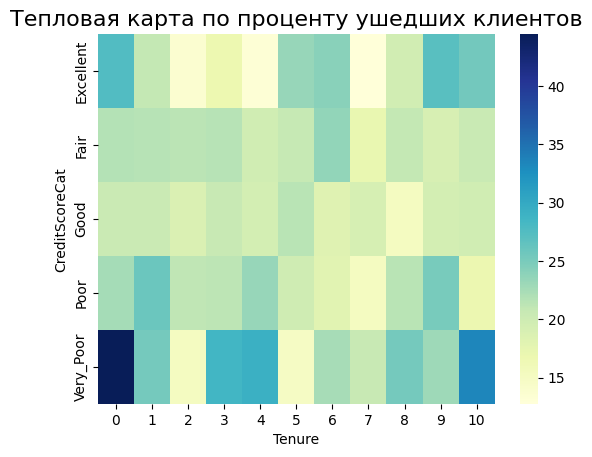

In [357]:
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта по проценту ушедших клиентов', fontsize=16);

## Ответ на задание 10
На уход клиентов влияет в первую очередь кредитный ретинг. Уходить склонны те, кто имеет низкий и очент низкий кредитный рейтинг, а также очень высокий. Люди со средними показателями кредитоно рейтинга чаще остаются лояльными клиентами. Срок пользования услугами банка не оказывает существенного влияния на клиентов со средними показателями кредитного рейтинга (все они более-менее лояльны). А вот для клиентов с очень низким и очень высоким кредитным рйетингом срок пользования услугами банка играет роль. Они склонны прекращать пользоваться услоугшами банка либо в самам начале сотрудничестсва, либо когда работают с банком около 9-10 лет.